# Developer Student Club (DSC) - Beginner Machine Learning Track 

### Classification
Is a problem of identifying which categories an observation belongs to based on the training data.

Examples of Classification include:
* Detect *Spam* and *Non-Span* Email
* Detect cancer or not

### Logistic Regression
Is a binary classifier that examines the linear relationship between features and label. In this notebook, the model uses [Sigmoid Function](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) to compute the probability for which categories an observation belongs to.
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

* Probability *f(x)* ranges from minimum 0 to maximum 1 that the closer f(x) to 1, the more likely the observation is in one category; and the closer f(x) to 0, the less likely the observation is in that cateogry.
* E.g. Logistic Regression to detect *Spam* and *Non-Span* Email with *Spam email* when f(x) = 1 and *Non-Spam email* when f(x) = 0. The f(x) = 0.9 means that there is 90% of likeliness that the email is Spam. 
* Logistic Regression can be used for both **Binary Classification** and **Multi-Classification**

### Logistic Regression for identifying Iris flower types. 
### [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The **use of multiple measurements** in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to **quantify the morphologic variation of Iris flowers of three related species**. 
* The data set consists of **50 samples from each of three species** of Iris (Iris Setosa, Iris virginica, and Iris versicolor). **Four features** were measured from each sample: **the length and the width of the sepals and petals,** in centimeters.

![alt text](https://miro.medium.com/max/2006/1*8BQGOzI2cgNZxiqnjZPfMg.jpeg)

#### **Goal:** identify which specifici species of Iris the flower observation falls under

#### Import dependencies

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

#### Load data

In [50]:
#load iris data
iris = load_iris()
data = iris.data
labels = iris.target

In [104]:
#parse data and labels into pandas.DataFrames for easy data manipulation
#df - DataFrame
df = pd.DataFrame(data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species_id'] = labels

#add species_name for visualization
species_map = {0 : 'sentosa', 1 : 'versicolor', 2 : 'virginica'}
df['species_name'] = df['species_id'].map(species_map)

#### Explanatory Data Analysis

##### Inspect first 5 rows of Iris dataset

In [52]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


##### Inspect statistics of Iris dataset

In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Check missing values

In [54]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species_id      False
species_name    False
dtype: bool

##### Check Iris types

In [55]:
print(df['species_name'].unique())

['sentosa' 'versicolor' 'virginica']


##### Inspecting by visualization

###### Inspecting the balance of labels

<function matplotlib.pyplot.show(*args, **kw)>

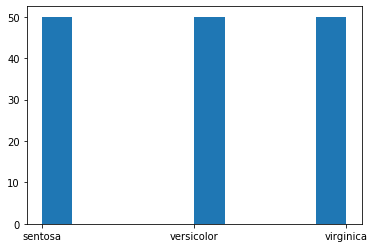

In [135]:
plt.hist(df['species_name'])
plt.show

###### Inspecting **Septal** feature by Length and Width

<function matplotlib.pyplot.show(*args, **kw)>

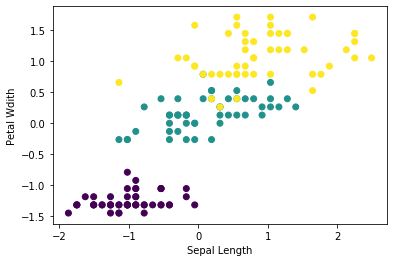

In [136]:
# By length
plt.scatter(df['sepal_length'], df['petal_width'], c = df['species_id'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Wdith')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

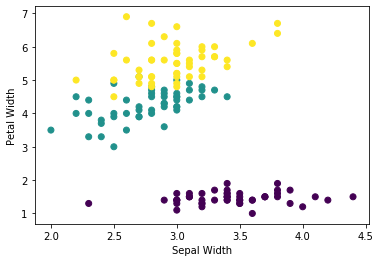

In [58]:
# By width
plt.scatter(df['sepal_width'], df['petal_length'], c = df['species_id'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show

#### Split dataset into Train and Test subsets: *80% for training and 20% for testing*

In [84]:
from sklearn.model_selection import train_test_split
features = df.drop(['species_id', 'species_name'], axis = "columns") #drop columns
labels = df['species_id']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, shuffle = True, random_state = 100)

#### Build **Logistic Regression** model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
#create an instance of LogisticRegression model with: iteration_num = 100 and verbose = 1
logit_model = LogisticRegression(max_iter = 100, verbose = 1)

**Logistic Regression: How it is trained?** 🤔

#### Train **Logisitc Regression** model

In [71]:
logit_model.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)\
**Definitions in Logistic Regression using Sigmoid function**
* Define Logistic Regression: **l(X) = σ(X)** using Sigmoid function: **σ(X) = 1 / (1 + e^(-X))**
* The **X** in Sigmoid function is defined: **X = w*x + b** that w, x, and b are weight, input matrix (or vector), and bias
* **Cost (Loss) functions**: **Cross Entropy (aka Log Loss)** \
![alt text](https://miro.medium.com/max/1122/1*KY8QcvVOz1sdUnVKKhxWyA@2x.png)

**Training steps**
* Randomly initialize **w** weight and **b** bias
* With given **w** and **b**, the model makes guess and calculate the loss/difference using the **Cross Entropy** function.
* With calculated loss, the weight **w** is updated: **new_w = old_w +/- ɑ * ∫(loss)**
* Above steps are repeated until the model **reaches minium loss or target loss**.\
![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png) 

#### Making predictions

##### Making **Train** predictions

In [72]:
train_preds = logit_model.predict(train_features)
train_pred_probabilities = logit_model.predict_proba(train_features)

In [134]:
#parse predictions to dataframe
train_predictions = pd.DataFrame(columns = ['Predictions', 'Predicted Probabilities', 'True Labels'])
train_predictions['True Labels'] = train_labels
train_predictions['Predictions'] = train_preds
train_predictions['Predicted Probabilities'] = train_pred_probabilities
train_predictions

,Predictions,Predicted Probabilities,True Labels
17,0,0.955385,0
42,0,0.981020,0
18,0,0.910351,0
146,1,0.001060,2
114,1,0.034626,2
75,2,0.004165,1
5,0,0.982650,0
15,0,0.995455,0
63,1,0.018647,1
142,1,0.020591,2


In [133]:
#get coefficeints and intercepts
train_W, train_b = logit_model.coef_, logit_model.intercept_
train_W, train_b

(array([[-2.17860568,  1.51411786],
        [ 0.57507251, -0.94631083],
        [ 1.60353317, -0.56780703]]),
 array([-0.95408242,  0.58350458,  0.37057785]))

Accuracy score: 
0.9523809523809523


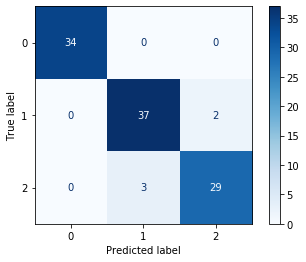

In [76]:
#test accuracy
train_confusion_matrix = confusion_matrix(train_preds, train_labels)
train_accuracy_score = accuracy_score(train_preds, train_labels)
train_disp = plot_confusion_matrix(logit_model, train_features, train_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(train_accuracy_score)

###### Visualizing Logistic Regression's train performance

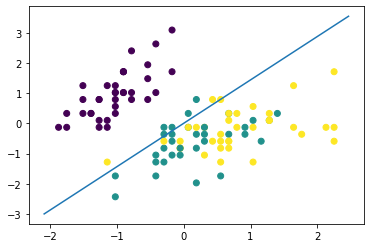

In [137]:
plt.scatter(train_features['sepal_length'], train_features['sepal_width'], c = train_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals * train_W[0][0]) / train_W[0][1]
plt.plot(xvals, yvals)
plt.show()

##### Making **Test** predictions

In [85]:
test_preds = logit_model.predict(test_features)
test_pred_probabilities = logit_model.predict_proba(test_features)

In [86]:
#parse predictions to dataframe
test_predictions = pd.DataFrame(columns = ['Predictions', 'Predicted Probabilities', 'True Labels'])
test_predictions['True Labels'] = test_labels
test_predictions['Predictions'] = test_preds
test_predictions['Predicted Probabilities'] = test_pred_probabilities


In [87]:
#get coefficeints and intercepts
test_W, test_b = logit_model.coef_, logit_model.intercept_
test_W, test_b

(array([[-0.40031137,  0.87999527, -2.28213297, -0.99449203],
        [ 0.48914372, -0.48218462, -0.18703953, -0.78541173],
        [-0.08883236, -0.39781064,  2.4691725 ,  1.77990376]]),
 array([  8.93512282,   2.54498524, -11.48010806]))

In [88]:
#print predictions
test_predictions

,Predictions,Predicted Probabilities,True Labels
128,2,2.768870e-05,2
11,0,9.663720e-01,0
118,2,1.807879e-08,2
15,0,9.834967e-01,0
123,2,9.360077e-04,2
135,2,1.324811e-06,2
32,0,9.850261e-01,0
1,0,9.586477e-01,0
116,2,1.150343e-04,2
45,0,9.612622e-01,0


Accuracy score: 
0.9777777777777777


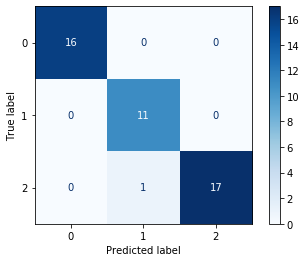

In [90]:
#test accuracy
test_confusion_matrix = confusion_matrix(test_preds, test_labels)
test_accuracy_score = accuracy_score(test_preds, test_labels)
test_disp = plot_confusion_matrix(logit_model, test_features, test_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(test_accuracy_score)

###### Visualizing Logisitc Regression's Test performance

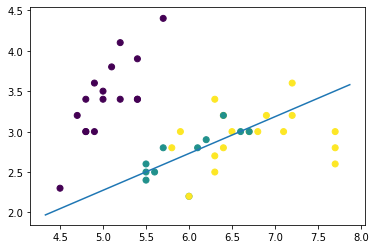

In [91]:
plt.scatter(test_features['sepal_length'], test_features['sepal_width'], c = test_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals * test_W[0][0]) / test_W[0][1]
plt.plot(xvals, yvals)
plt.show()

### Some thoughts
* Does accuracy score look good? 
=> Yes
* Does the model work that well? 
=> Yes, but not really. The dataset is too small (150 records) to conclude the model's performance
* How to improve?
=> Support Vector Machine (SVM) or Decision tree

#### Accuracy performance
---
In this notebook, the accuracy is high in both training and testing. However, the model may not maintain high accuracy against larger and rea-life datasets because this Iris dataset contains only 120 samples that do not represent variation.


#### Overfitting & Underfitting
---
**Overfitting** If the model does really great on the training data but poorly on the testing data, this means you may have overfitted.
  * **Reasons** : mostly due to the limited dataset that the model cannot be trained to be generalized. In this notebook, due to the limited Iris dataset, the logistic model in this notebook may easily encouter **overfitting** when it makes predictions against unseen data.
  * **Solutions** : simplify ML algorithms/models and/or add regularization, choose other activations, loss functions, etc.

**Underfitting** is when your model does not capture all the detail of the data while overfitting is when your model captures too much detail and ends up showcasing random noise as well.
  * **Reason** : happen due to the simplicity of Machine Learning algorithms or too few data features. 
  * **Solutions** : build more complex ML algorithms/models and/or add model parameters and data features.

  ![Overfitting & Underfitting](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

**References**
* Logistic Regression in Sci-Kit Learn, https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6
* Sigmoid Function, https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf